In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_excel("C:/Users/rtani/Desktop/Coading/customer segementation/Online Retail.xlsx")

In [4]:
df.head() #checking the dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.describe() #cheking the stats of dataset

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info() #getting the summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.dropna(inplace=True) #dropping any row with missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [17]:
df['TotalPurchase'] = df['Quantity'] * df['UnitPrice'] #creating new features

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
most_recent_date = df['InvoiceDate'].max()

In [20]:
new_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
                                            'InvoiceNo': 'count',
                                            'TotalPurchase': 'sum'})

In [21]:
new_df.head()

,InvoiceDate,InvoiceNo,TotalPurchase
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


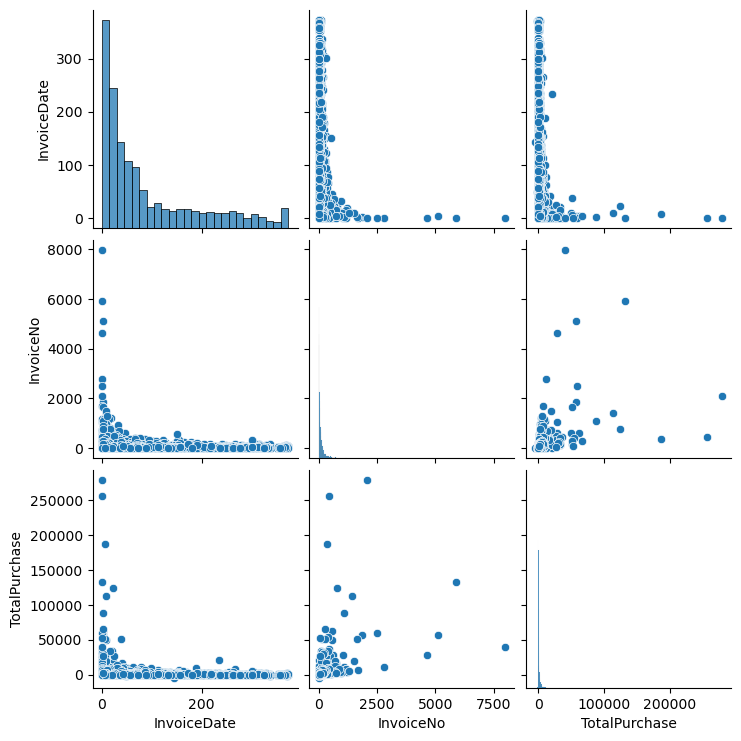

In [22]:
sns.pairplot(new_df)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
scaler = StandardScaler()
norm_df = scaler.fit_transform(new_df) #standardize the data
norm_df

array([[ 2.32202285, -0.3917197 , -0.23100099],
       [-0.89373323,  0.38265697,  0.29343167],
       [-0.1691956 , -0.26695902, -0.01231622],
       ...,
       [-0.83418219, -0.34439668, -0.20951263],
       [-0.87388289,  2.85205812,  0.02390005],
       [-0.48680114, -0.0991774 , -0.00744423]])

In [28]:
inertia = [] #stores the sum of squared distance
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(norm_df)
    inertia.append(kmeans.inertia_)

C:\Users\rtani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rtani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rtani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rtani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rtani\anaconda3\lib\site-packages\sklearn\clust

Text(0, 0.5, 'Inertia')

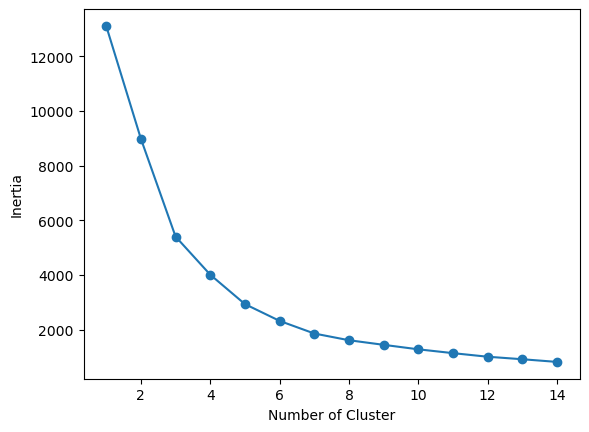

In [30]:
plt.plot(range(1,15), 
         inertia,
         marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')

In [34]:
silhouette_scores = []

for k in range(2, 15):  #evaluate the performance of the clustering
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(norm_df)
    silhouette_scores.append(silhouette_score(norm_df, labels))

C:\Users\rtani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rtani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rtani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rtani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rtani\anaconda3\lib\site-packages\sklearn\clust

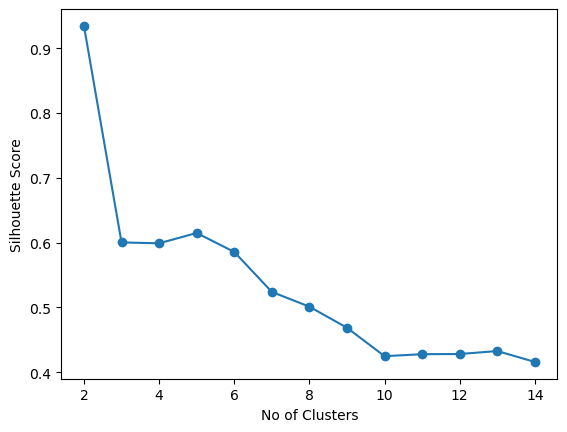

In [37]:
plt.plot(range(2,15), silhouette_scores, marker='o')
plt.xlabel("No of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [38]:
"""We can see that at silhouette score for clusters 3,4 are similar and moving from 3 to 4 we can see the inertia value
drops good so we can conclude that number of clusters should be 3 for optimal customer segmentations"""

'We can see that at silhouette score for clusters 3,4 are similar and moving from 3 to 4 we can see the inertia value\ndrops good so we can conclude that number of clusters should be 3 for optimal customer segmentations'

In [39]:
final_kmeans = KMeans(n_clusters=3,random_state=42)
final_kmeans.fit(norm_df)

C:\Users\rtani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [41]:
final_df = pd.DataFrame(new_df, columns=new_df.columns, index=new_df.index)
final_df['Cluster'] = final_kmeans.labels_ + 1
final_df.head(10)

,InvoiceDate,InvoiceNo,TotalPurchase,Cluster
CustomerID,,,,
12346.0,325,2,0.00,2
12347.0,1,182,4310.00,1
12348.0,74,31,1797.24,1
12349.0,18,73,1757.55,1
12350.0,309,17,334.40,2
12352.0,35,95,1545.41,1
12353.0,203,4,89.00,2
12354.0,231,58,1079.40,2
12355.0,213,13,459.40,2


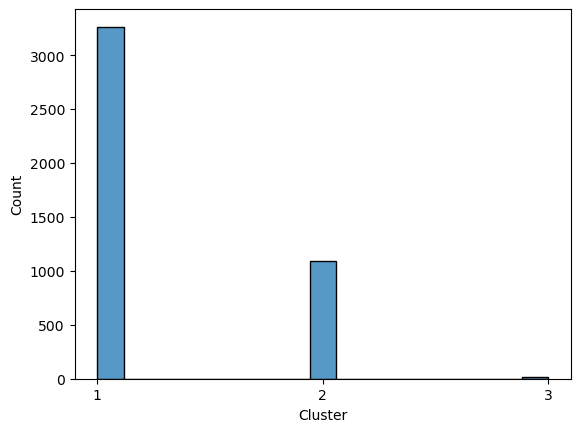

In [42]:
sns.histplot(final_df.Cluster)
plt.xticks(range(1,4))
plt.show()

In [43]:
final_df.groupby('Cluster').agg({'TotalPurchase':'mean',
                                 'InvoiceNo':'mean',
                                 'InvoiceDate':'mean'})

,TotalPurchase,InvoiceNo,InvoiceDate
Cluster,,,
1,1950.597005,104.874694,39.254289
2,464.197911,27.710766,246.244526
3,118713.023333,2845.583333,4.000000


In [ ]:
"""Final Conclusion :- 
Cluster 1 : In this cluster, comes the regular customers since the frequence is moderate and the purchase is high as well.
Cluster 2: This cluster consist of some some seasonal customers doing infrequent purchase.
Cluster 3: These clusters consist of some very important customers doing exceptionally high value purchase these should be
terated as VIP' since they contribute the most in the business"""